Some Imports which will be required

In [509]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from math import radians, cos, sin, asin, sqrt 
from  geopy.geocoders import Nominatim

Some Random Code which you don't need to worry about

In [510]:
df_cost=pd.read_csv("/content/drive/My Drive/ML/lat.csv")
df_qual= pd.read_csv("/content/drive/My Drive/ML/movehubcostofliving.csv")

In [511]:
df_qual.sort_values('City',inplace=True,ignore_index=True)

In [512]:
df_cost.sort_values('City',inplace=True,ignore_index=True)

In [513]:
df = pd.concat([df_cost,df_qual.drop(['City'],axis=1)],axis=1)
df.columns = df.columns.str.replace(' ','_')

In [514]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    valueScaled = float(value - leftMin) / float(leftSpan)

    return rightMin + (valueScaled * rightSpan)

In [515]:
df['Overall_Score']=0
inc_features = [ 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 
       'Quality_of_Life', 'Avg_Disposable_Income']
dec_features = ['Pollution','Crime_Rating','Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent']
for i in range(0,216):
  score = []
  for feat in inc_features:
    val = df[feat][i]
    var = translate(val,df[feat].min(),df[feat].max(),0,10)
    score.append(var)
  for feat in dec_features:
    val = df[feat][i]
    var = translate(val,df[feat].min(),df[feat].max(),10,0)
    score.append(var)
  df['Overall_Score'][i]= sum(score)/12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [516]:
city_name = df['City'].tolist()

Visualising Overall City Ranking

In [517]:
#@title Default title text
features=['City', 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution',
       'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income',
       'Overall_Score']
fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color="Overall_Score", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

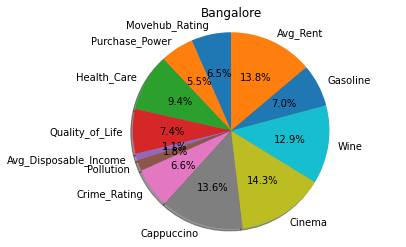

In [546]:
#@title Enter the City name whose feature contribution to Overall Score you want to Visualize
City = 'Bangalore'#@param {type:"string"}

inc_features = [ 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 
       'Quality_of_Life', 'Avg_Disposable_Income']
dec_features = ['Pollution','Crime_Rating','Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent']
score = []

df_pie = df[df.City == City]
for feat in inc_features:
  val = df_pie[feat]
  var = translate(val,df[feat].min(),df[feat].max(),0,10)
  score.append(var)
for feat in dec_features:
  val = df_pie[feat]
  var = translate(val,df[feat].min(),df[feat].max(),10,0)
  score.append(var)

labels = 'Movehub_Rating', 'Purchase_Power', 'Health_Care','Quality_of_Life', 'Avg_Disposable_Income','Pollution','Crime_Rating','Cappuccino', 'Cinema','Wine', 'Gasoline', 'Avg_Rent'

fig1, ax1 = plt.subplots()
ax1.pie(score,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(City)
plt.show()

Visualising Each Feature Distribution

In [547]:
#@title Enter the Feature you want to visualize
Feature= 'Quality_of_Life' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color=Feature, hover_name="City",
                        hover_data=['City',Feature],
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

In [549]:
#@title Enter the Feature for which you want to obtain City Category
le=LabelEncoder()
df_no_city =df.drop(['City'],axis=1)
df_city = df.iloc[:,0:1]
le_city = le.fit_transform(df_city)
df_city = pd.DataFrame(le_city,columns=['LE'])
df_k_means = pd.concat([df_city,df],axis = 1)

Feature= 'Pollution' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

X1=df_k_means[[Feature]]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X1)
X1=np.squeeze(X1)

features = ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Quality_of_Life', 'Pollution', 'Crime_Rating']


df['Cluster']=pd.Series(y_kmeans)
fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color="Cluster", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [521]:
df['Avg_Disposable_Income'].max()

4266.11

In [550]:
#@title Enter the score you want for each parameter

movehub_rating = "70" #@param {type:"string"}
purchase_power = "1" #@param {type:"string"}
health_care = "80" #@param {type:"string"}
quality_of_life = "0" #@param {type:"string"}
pollution = "100" #@param {type:"string"}
crime_rating = "100" #@param {type:"string"}
avg_rent = "6000" #@param {type:"string"}
avg_disposable_income = "0" #@param {type:"string"}
gasoline = "2" #@param {type:"string"}
cinema = "100" #@param {type:"string"}
wine = "30" #@param {type:"string"}
cappuccino = "5" #@param {type:"string"}

df1 = df[((df.Movehub_Rating )>float(movehub_rating))&((df.Purchase_Power)>float(purchase_power))&
         ((df.Health_Care )>float(health_care))& ((df.Pollution )<float(pollution))
         &((df.Crime_Rating )<float(crime_rating))&((df.Avg_Rent )<float(avg_rent))&((df.Avg_Disposable_Income )>float(avg_disposable_income))
         &((df.Gasoline )<float(gasoline))&((df.Cinema )<int(cinema))&((df.Wine )<int(wine))&((df.Cappuccino )<int(cappuccino))]



features = df.columns
fig = px.scatter_mapbox(df1,
                        lat="lat", lon="lng",  hover_name="City",
                        hover_data=features,color='Overall_Score',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()
df1.sort_values('Overall_Score',ascending=False)




,City,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,lat,lng,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Overall_Score,Cluster
189,Stuttgart,82.48,65.82,80.38,16.89,90.40,23.96,48.775846,9.182932,2.13,6.82,4.26,1.32,980.35,1943.66,7,0
42,Canberra,83.23,63.26,91.90,11.48,93.05,40.36,-35.280937,149.130009,2.35,11.42,10.08,0.99,1984.74,3023.91,7,0
125,Marbella,81.96,60.14,83.64,32.27,75.24,9.11,36.510071,-4.882447,1.70,5.88,4.48,1.17,852.48,1619.72,7,3
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,57.149717,-2.094278,1.99,6.98,5.98,1.37,1195.74,1743.78,6,3
83,Hamilton,81.34,56.52,86.67,81.68,84.83,35.68,37.942610,-96.195132,1.91,7.01,8.29,0.80,605.64,1593.78,6,1
200,Trondheim,80.36,51.22,81.67,14.53,82.67,19.80,63.430515,10.395053,3.81,12.32,13.44,1.57,1680.55,2800.92,6,0
199,Toulouse,82.10,54.47,81.01,36.23,66.66,47.27,43.604652,1.444209,1.92,7.25,4.26,1.28,1022.98,2011.86,6,3
187,Stockholm,82.85,51.03,82.50,13.93,78.58,25.62,59.329323,18.068581,3.00,11.01,7.91,1.46,1501.88,2002.51,6,0
156,Perth,95.38,62.11,80.56,23.53,74.62,50.01,-31.950527,115.860457,2.87,11.43,10.08,0.97,2083.14,3358.55,6,3
146,Nice,82.55,49.52,87.95,59.19,68.34,47.27,43.710173,7.261953,2.13,8.10,5.11,1.30,1278.72,1624.66,6,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



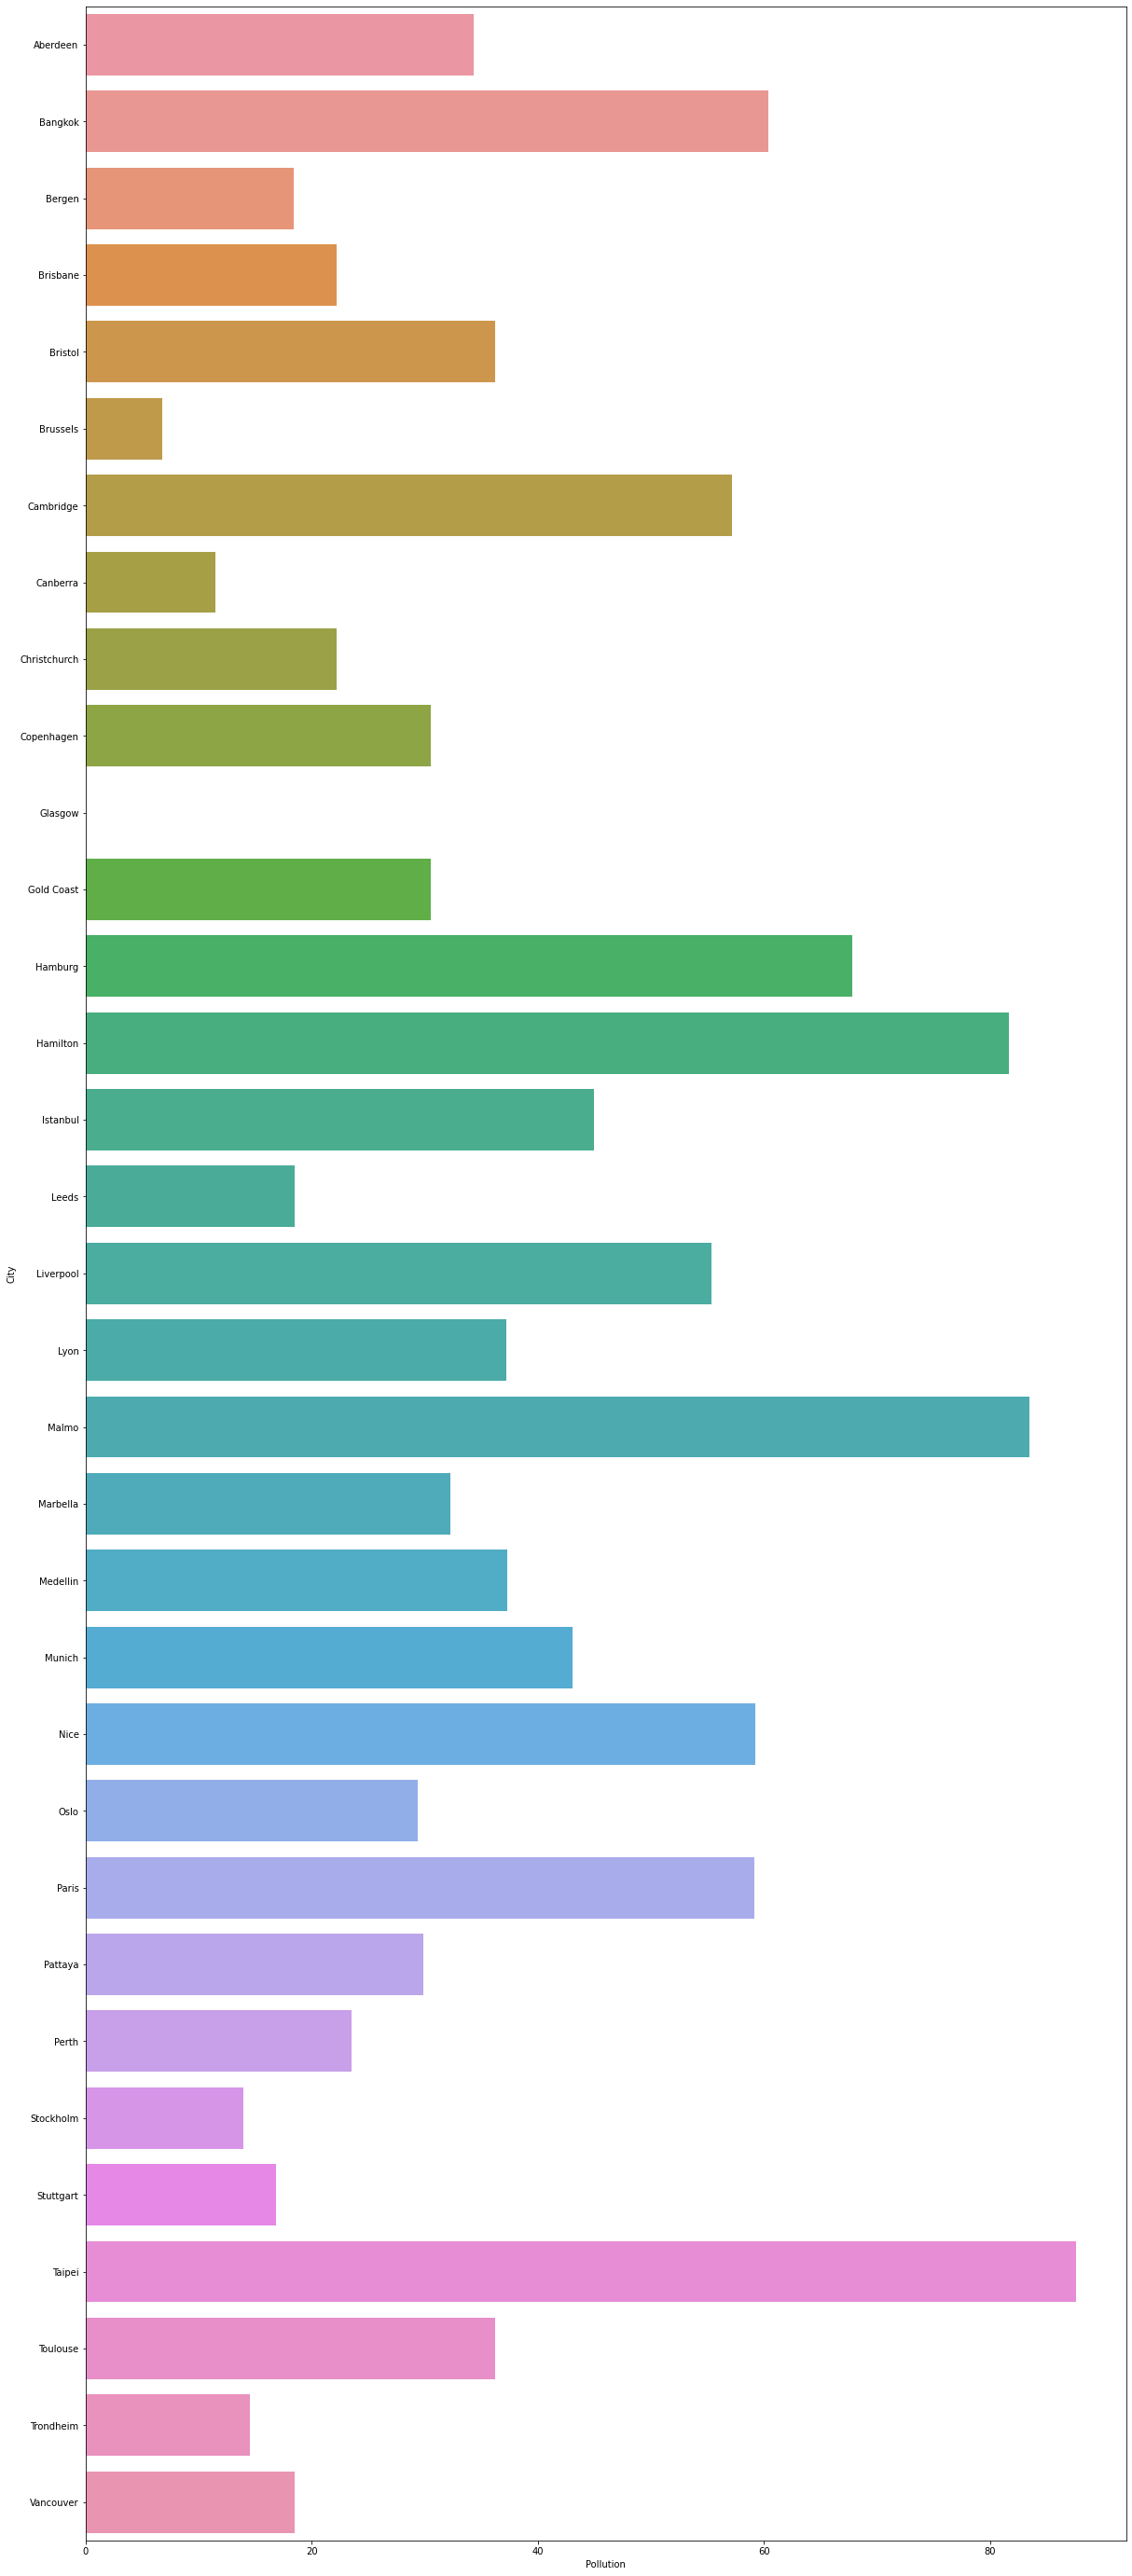

In [523]:
#@title Enter the Feature you want to compare between your shortlisted Cities
Feature= 'Pollution' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

fig, ax = plt.subplots(figsize=(20,50))
sns.barplot(df1[Feature],df1['City'],ax=ax)

In [545]:
#@title Distance from where your family lives
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 
    d=distance(lat1, lat2, lon1, lon2) 

cities = df
geolocator = Nominatim()
city = 'Agra' #@param {type:"string"}
country = 'India' #@param {type:"string"}
dist='200' #@param {type:"string"}
dist = float(dist)


loc = geolocator.geocode(city+','+ country)
lath=loc.latitude
lngh=loc.longitude



citylat=cities['lat']
citylng=cities['lng']


geolocator = Nominatim()
Prob_city = [0]*216
count=0    
for i in range (0,216):
    loc = geolocator.geocode(cities['City'][i])
    
    latc=cities['lat'][i]
    lngc=cities['lng'][i]
    d=distance(lngc,lngh,latc,lath)
    Prob_city[i]=distance(lngc,lngh,latc,lath)


Prob=pd.DataFrame(Prob_city,columns=['Distance from home'])
Final=pd.concat([cities,Prob],axis=1)
features = df.columns
fig = px.scatter_mapbox(Final.sort_values('Distance from home', ascending=True).round(),
                        lat="lat", lon="lng", color="Distance from home", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()



/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.

